## TD Lambda

In [1]:
# Imports
from __future__ import print_function
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.collections import LineCollection
from matplotlib import cm
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys

module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from parameters import *

In [45]:
from model_plot_utils import plot_trajectory

In [4]:
from TDLambdaXSteps_model import TDLambdaXStepsRewardReceived

In [5]:
model = TDLambdaXStepsRewardReceived()

In [6]:
nodemap = model.get_SAnodemap()

In [34]:
for i in range(0, 128):
    print(i, "==>", nodemap[i])

0 ==> [127   1   2]
1 ==> [0 3 4]
2 ==> [0 5 6]
3 ==> [1 7 8]
4 ==> [ 1  9 10]
5 ==> [ 2 11 12]
6 ==> [ 2 13 14]
7 ==> [ 3 15 16]
8 ==> [ 3 17 18]
9 ==> [ 4 19 20]
10 ==> [ 4 21 22]
11 ==> [ 5 23 24]
12 ==> [ 5 25 26]
13 ==> [ 6 27 28]
14 ==> [ 6 29 30]
15 ==> [ 7 31 32]
16 ==> [ 7 33 34]
17 ==> [ 8 35 36]
18 ==> [ 8 37 38]
19 ==> [ 9 39 40]
20 ==> [ 9 41 42]
21 ==> [10 43 44]
22 ==> [10 45 46]
23 ==> [11 47 48]
24 ==> [11 49 50]
25 ==> [12 51 52]
26 ==> [12 53 54]
27 ==> [13 55 56]
28 ==> [13 57 58]
29 ==> [14 59 60]
30 ==> [14 61 62]
31 ==> [15 63 64]
32 ==> [15 65 66]
33 ==> [16 67 68]
34 ==> [16 69 70]
35 ==> [17 71 72]
36 ==> [17 73 74]
37 ==> [18 75 76]
38 ==> [18 77 78]
39 ==> [19 79 80]
40 ==> [19 81 82]
41 ==> [20 83 84]
42 ==> [20 85 86]
43 ==> [21 87 88]
44 ==> [21 89 90]
45 ==> [22 91 92]
46 ==> [22 93 94]
47 ==> [23 95 96]
48 ==> [23 97 98]
49 ==> [ 24  99 100]
50 ==> [ 24 101 102]
51 ==> [ 25 103 104]
52 ==> [ 25 105 106]
53 ==> [ 26 107 108]
54 ==> [ 26 109 110]
55 ==> [

In [10]:
sim_data_file = 'TDlambdaXsteps_stan/traj_data/real_traj/TDlambdaXsteps_data.p'

In [11]:
TrajS = model.load_trajectories(sim_data_file)

In [13]:
TrajA = model.load_TrajA(TrajS, nodemap)

In [73]:
TrajA[0][2]

array([3, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
t=TrajS[0][2]
t

array([  0,   2,   6,  13,  28,  57, 116,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1])

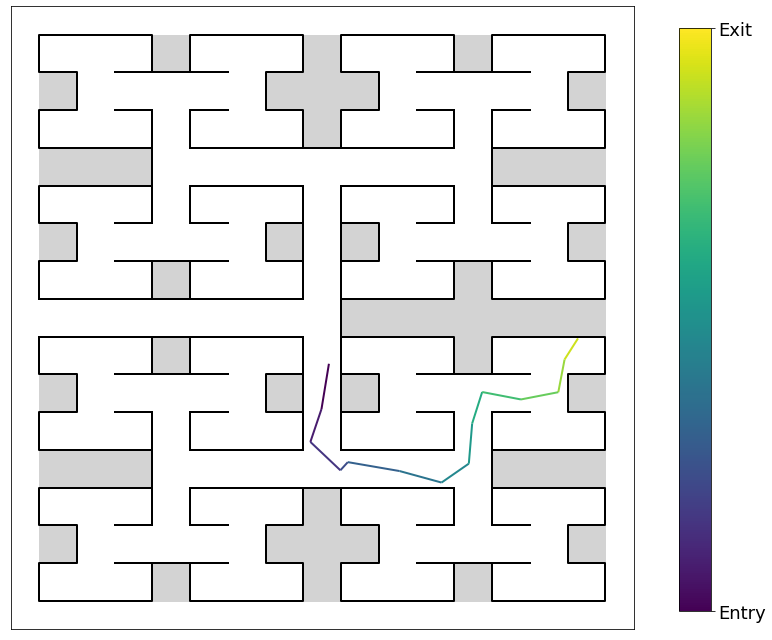

In [74]:
plot_trajectory({1: t[:7]}, 'all')

In [32]:
for i in TrajS:
    print(len(i))

143
143
143
143
143
143
143
143
143
143


In [62]:

total = 0
for ni in RewNames:
    tf=LoadTraj(f'{ni}-tf')
    s = sum([len(b) for b in tf.re])
    print(ni, s)
    total += s

B1 74
B2 115
B3 50
B4 133
C1 133
C3 143
C6 112
C7 115
C8 123
C9 138


In [63]:
total1

1136

In [52]:
sum([len(b) for b in tf.re])

50

In [58]:
[len(b) for b in tf.re]

[0,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [ ]:
# Plotting results from running TD(0) model above

# Plotting state values
fig, ax = plt.subplots(figsize=(30,800))
axhandle = ax.imshow(np.transpose(np.reshape(avg_V,(S+1,1))),cmap='YlGnBu')
ax.invert_yaxis()
ax.set_ylabel('V (s)')
ax.set_xticks(np.arange(0,127,5))
ax.set_xticklabels([str(val) for val in np.arange(0,127,5)])
ax.set_xlabel('Nodes')
ax.set_title('Average state values for TD(0) with alpha: %.2f, beta: %.2f and gamma: %.2f' % (alpha,beta,gamma))
fig.colorbar(axhandle,fraction=0.005)

print('Max state value ', np.max(avg_V))
print('Min state value', np.min(avg_V))

# Set trajectories for plotting
print('Total reward: ', total_reward)
print('alpha: ', alpha, ' beta: ', beta, ' gamma: ', gamma)
plot_trajectory(state_hist_all, 'all')

## Simulating Fake Data to test Parameter Recovery for a Model

In [ ]:
# Look into paramater_recovery_utils.py

## Evaluating Model Fit with Real data

In [ ]:
# Look into evaluating_models.py

In [ ]:
# Save plots generated from model fit results for each mouse

save_dir = 'C:/Users/kdilh/Documents/GitHub/MouseMaze/figures/TD0_firstreward/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for mouseID, nickname in enumerate(RewNames):
    state_hist_cell, state_hist_xy = nodes2cell(state_hist_AllMice[mouseID])
    figtitle = 'Simulated trajectory for '+nickname+' with '+str(valid_bouts[mouseID]) \
    +' valid bouts \n '+\
    ' alpha: '+str(np.round(best_sub_fits[mouseID][0],2))+\
    ' beta: '+str(np.round(best_sub_fits[mouseID][1],2))+\
    ' gamma: '+str(np.round(best_sub_fits[mouseID][2],2)) + ', subject LL - random LL: ' + str(np.round(best_sub_fits[mouseID][3] - rand_LL[mouseID],2))
    plot_trajectory('all', save_dir, nickname, figtitle)  # enter a single episode ID or enter 'all'


In [30]:
with open("/Volumes/ssrde-home/TD0Xsteps_stan_results/TD0Xsteps_fit.pkl", "rb") as f:
    data_dict = pickle.load(f)

ModuleNotFoundError: No module named 'stanfit4anon_model_51076bc1fe2802ba5b8d5b473e68ed5b_4224603987671147085'